<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Adding-the-cell-fractions-in-individuals-with-multiple-mCAs-(=-mLOY)" data-toc-modified-id="Adding-the-cell-fractions-in-individuals-with-multiple-mCAs-(=-mLOY)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Adding the cell fractions in individuals with multiple mCAs (= mLOY)</a></span></li><li><span><a href="#Subtracting-the-summed-maternal/-paternal-cell-fraction-groups-in-individuals-with-multiple-mCAs-(=-mLOX)" data-toc-modified-id="Subtracting-the-summed-maternal/-paternal-cell-fraction-groups-in-individuals-with-multiple-mCAs-(=-mLOX)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Subtracting the summed maternal/ paternal cell fraction groups in individuals with multiple mCAs (= mLOX)</a></span></li></ul></li></ul></div>

The code below requires simulated data generated using 'UK Biobank simulation.ipynb'. Data was generated from 3 different simulations (all seed = 3):
- Fitness 0.101, mutation rate 1e-6
- Fitness 0.101, mutation rate 1e-5
- Fitness 0.101, mutation rate 1e-4

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
import csv
import scipy
from scipy import integrate
from scipy.integrate import quad
from scipy.special import gamma
import numpy as np
import math
import random

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [5]:
mLOY_color = '#213468'
mLOX_color = '#a6cee3'

In [6]:
total_people = 502411

# Functions

In [8]:
def log_logit_CFs(cell_fraction_list, lower_limit, integral_limit): #log and logit cell fractions
    logCFs = []
    logitCFs = []
    CFs = []

    for i in cell_fraction_list:
        if i !=0:
            if lower_limit <= (i) <= integral_limit:
                logitCFs.append(scipy.special.logit(float(i)))
                logCFs.append(np.log(float(i)))
                CFs.append(float(i))
    print('total mCAs = '+str(len(logitCFs)))
    print('max cell fraction = ', max(CFs))

    return logCFs, logitCFs

In [9]:
def Probtheory(l, params): #= predicted density (i.e. normalised by mu)
    total_density=0.0
    N = 9.40166610e+04 #N inferred from DNMT3A R882H

    s=params[0]

    age40_49_ratio = 119000/(119000+168000+213000)
    age50_59_ratio = 168000/(119000+168000+213000)
    age60_69_ratio = 213000/(119000+168000+213000)

    total_density= age40_49_ratio*(integrate.quad(lambda t: (N/(1-np.exp(l))*np.exp(-((np.exp(l))/(((np.exp(s*t)-1)/(N*s))*(1-np.exp(l))))))*\
                             (1/9.99), 40, 49.99))[0]+\
              age50_59_ratio*(integrate.quad(lambda t: (N/(1-np.exp(l))*np.exp(-((np.exp(l))/(((np.exp(s*t)-1)/(N*s))*(1-np.exp(l))))))*\
                             (1/9.99), 50, 59.99))[0]+\
               age60_69_ratio*(integrate.quad(lambda t: (N/(1-np.exp(l))*np.exp(-((np.exp(l))/(((np.exp(s*t)-1)/(N*s))*(1-np.exp(l))))))*\
                             (1/9.99), 60, 69.99)[0])

    return total_density

In [10]:
def Probtheory_mLOY(l, params): #= predicted density (i.e. normalised by mu)
    total_density=0.0
    N = 9.40166610e+04 #N inferred from DNMT3A R882H

    s=params[0]
    mu = params[1]

    age40_49_ratio = 119000/(119000+168000+213000)
    age50_59_ratio = 168000/(119000+168000+213000)
    age60_69_ratio = 213000/(119000+168000+213000)

    total_density= age40_49_ratio*(integrate.quad(lambda t: (1/(gamma(N*mu))*\
                                                             ( (np.exp(- (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)) )/(1-np.exp(l)) ))  / (( (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)))/ (1-np.exp(l)) )**(1-(N*mu))) )*\
                                                             (np.exp(l)/((1-np.exp(l))**2))*\
                                                             (1/((np.exp(s*t)-1)/(N*s))))*\
                             (1/9.99), 40, 49.99))[0]+\
              age50_59_ratio*(integrate.quad(lambda t: (1/(gamma(N*mu))*\
                                                        ( (np.exp(- (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)) )/(1-np.exp(l)) ))  / (( (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)))/ (1-np.exp(l)) )**(1-(N*mu))) )*\
                                                        (np.exp(l)/((1-np.exp(l))**2))*\
                                                        (1/((np.exp(s*t)-1)/(N*s))))*\
                             (1/9.99), 50, 59.99))[0]+\
               age60_69_ratio*(integrate.quad(lambda t: (1/(gamma(N*mu))*\
                                                         ( (np.exp(- (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)) )/(1-np.exp(l)) ))  / (( (np.exp(l)/ ((np.exp(s*t)-1)/(N*s)))/ (1-np.exp(l)) )**(1-(N*mu))) )*\
                                                         (np.exp(l)/((1-np.exp(l))**2))*\
                                                         (1/((np.exp(s*t)-1)/(N*s))))*\
                             (1/9.99), 60, 69.99)[0])

    return total_density

In [11]:
def error_bars(hist, normed_value, widths):

    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]

    return err

In [12]:
def plot_data_non_cumulative(ax, mu, log_cell_fractions, total_people, color):
    bin_size = 'doane'

    normed_value = total_people*mu #study_total*mu
    hist, bins = np.histogram(log_cell_fractions, bins=bin_size, range=(min(log_cell_fractions),max(log_cell_fractions)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)

    errors = error_bars(hist, normed_value, widths)

    m_width = 1.5
    c_size = 3
    c_thick = 1.5
    e_width = 1.5

    ax.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = 'o', ecolor = color, \
     elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = 8, markeredgewidth = 0.5, \
     markeredgecolor = 'k', markerfacecolor = color, zorder=50)

    return ax

In [13]:
def three_plots_with_single_distribution(mCA, integral_limit, label, s, mu, log_cell_fractions, total_people):

    ###################################################
    fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    
    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]

    ## Plot the data ###
    m_width = 1.5
    c_size = 3
    c_thick = 1.5
    e_width = 1.5

    if label == 'mLOY':
        color = mLOY_color
    if label == 'mLOX':
        color = mLOX_color

    plot_data_non_cumulative(ax1, mu[0], log_cell_fractions[0], total_people, color)
    plot_data_non_cumulative(ax2, mu[1], log_cell_fractions[1], total_people, color)
    plot_data_non_cumulative(ax3, mu[2], log_cell_fractions[2], total_people, color)
    
    ax1.set_title('(s = '+str(s)+', mu = '+str(mu[0])+', '+label+')')
    ax2.set_title('(s = '+str(s)+', mu = '+str(mu[1])+', '+label+')')
    ax3.set_title('(s = '+str(s)+', mu = '+str(mu[2])+', '+label+')')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","","100"]

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]

    for ax in axes.flatten():
        ax.set_xlabel('fraction of cells (%)')
        ax.set_xticks(x_major_ticks)
        ax.set_xticklabels(x_major_tick_labels)
        ax.set_yticks(y_major_ticks)
        ax.set_yticklabels(y_major_tick_labels)
        ax.tick_params(axis = 'both', which = 'major', color = grey4)
        ax.tick_params(axis = 'both', which='minor', bottom=False)
        ax.set_ylim(0.01, np.log(2*10**6))
        ax.set_xlim(-9, 0)
        ax.set_ylabel('relative density of mCAs')

    ######## plot the theory line ########
    def plot_theory(ax, mu, s):
        if label == 'all mCAs':
            x=np.linspace(-10, np.log(0.99), 100)
            y=[Probtheory(l, [s, mu]) for l in x]
            ax.plot(x, np.log(y), c = color, alpha = 0.75, lw = 3, zorder = 0)

            x=np.linspace(np.log(0.9), np.log(0.9999), 100)
            y=[Probtheory(l, [s, mu]) for l in x]
            ax.plot(x, np.log(y), c = color, alpha = 0.75, lw = 3, zorder = 0)  

        else:
            x=np.linspace(-10, np.log(0.99), 100)
            y=[Probtheory_mLOY(l, [s, mu])/mu for l in x]
            ax.plot(x, np.log(y), c = '#213468', alpha = 0.75, lw = 3, zorder = 1)

            x=np.linspace(np.log(0.9), np.log(0.9999), 100)
            y=[Probtheory_mLOY(l, [s, mu])/mu for l in x]
            ax.plot(x, np.log(y), c = '#213468', alpha = 0.75, lw = 3, zorder = 1)

            x=np.linspace(-10, np.log(0.99), 100)
            y=[Probtheory(l, [s, mu]) for l in x]
            ax.plot(x, np.log(y), c = grey3, alpha = 0.75, lw = 3, linestyle = ':', zorder = 0)

            x=np.linspace(np.log(0.9), np.log(0.9999), 100)
            y=[Probtheory(l, [s, mu]) for l in x]
            ax.plot(x, np.log(y), c = grey3, alpha = 0.75, lw = 3, linestyle = ':', zorder = 0)    
            
        return ax

    plot_theory(ax1, mu[0], s)
    plot_theory(ax2, mu[1], s)
    plot_theory(ax3, mu[2], s)
    
    plt.tight_layout()

    savename = label.replace(' ', '_')

    plt.savefig('Figures/Simulations/High_mu_multiple_mCAs_'+str(savename)+'_cell_fraction_density_histograms_3_mus.pdf')

    return print('histogram plotted')

In [14]:
def plot_3_cell_fractions(s_mCA, mu_mCA, cell_fractions, label):
    
    lower_limit = 0.0003
    integral_limit = 0.67
    labelname = '(s = '+str(s_mCA)+', mu = '+str(mu_mCA)+', '+label+')'
    log_cell_fractions1, logit_cell_fractions1 = log_logit_CFs(cell_fractions[0], lower_limit, integral_limit)
    log_cell_fractions2, logit_cell_fractions2 = log_logit_CFs(cell_fractions[1], lower_limit, integral_limit)
    log_cell_fractions3, logit_cell_fractions3 = log_logit_CFs(cell_fractions[2], lower_limit, integral_limit)
    
    log_cell_fractions = [log_cell_fractions1, log_cell_fractions2, log_cell_fractions3]
    
    return three_plots_with_single_distribution('mCA-', integral_limit, label, s_mCA, mu_mCA, log_cell_fractions, total_people)

## Adding the cell fractions in individuals with multiple mCAs (= mLOY)

In [15]:
def mLOY_cell_fractions(s_mCA, mu_mCA):
    with open('biobank_sim_test_u='+str(mu_mCA)+'_s_'+str(s_mCA)+'_N100000_u_mCA='+str(mu_mCA)+'_seed3_biobank_variants.csv') as csvfile:
    #simulated file created using 'UK Biobank simulation.ipynb', seed = 3
    #3 simulated files created (all with fitness = 0.101), mu = 1e-6, mu = 1e-5, mu = 1e-4
        
        readreader = csv.reader(csvfile)
        row_count = 0

        person_mCAs_added = {}

        for row in readreader:
            if row_count>0:
                person_ID = row[0]
                age = float(row[1])
                mutation_ID = row[2]
                true_freq = float(row[6])

                if person_ID in person_mCAs_added.keys():
                    person_mCAs_added[person_ID]+=true_freq
                else:
                    person_mCAs_added[person_ID]=true_freq

            row_count+=1

    all_mCAs_added_cell_fractions = []
    for k, v in person_mCAs_added.items():
        all_mCAs_added_cell_fractions.append(float(v))
        
    return all_mCAs_added_cell_fractions

In [23]:
mLOY_cell_fractions_mu6 = mLOY_cell_fractions(0.101, 1e-6)
mLOY_cell_fractions_mu5 = mLOY_cell_fractions(0.101, 1e-5)
mLOY_cell_fractions_mu4 = mLOY_cell_fractions(0.101, 1e-4)

total mCAs = 171163
max cell fraction =  0.38180061363165785
total mCAs = 495897
max cell fraction =  0.5028847022787484
total mCAs = 502183
max cell fraction =  0.669807467702295


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipyke

histogram plotted


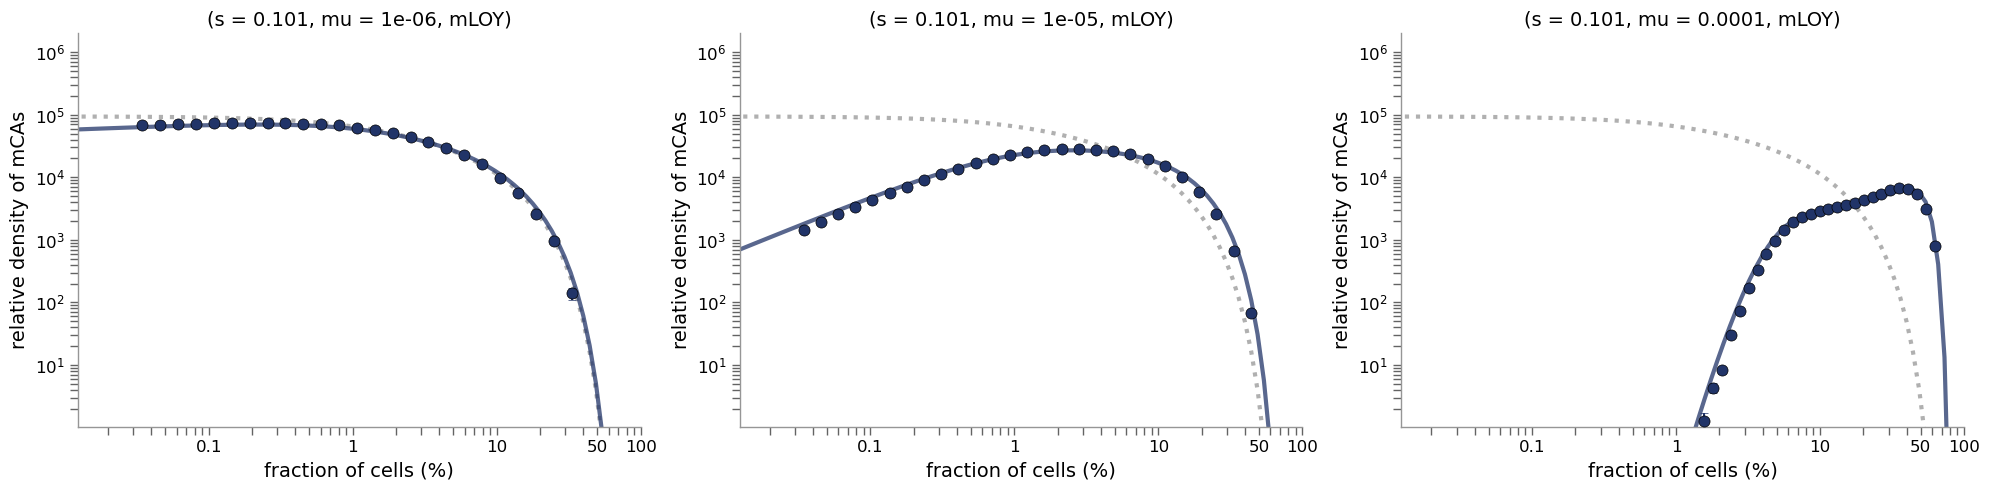

In [40]:
cell_fractions = [mLOY_cell_fractions_mu6, mLOY_cell_fractions_mu5, mLOY_cell_fractions_mu4]
mu_mCA = [1e-6, 1e-5, 1e-4]
s_mCA = 0.101

plot_3_cell_fractions(s_mCA, mu_mCA, cell_fractions, 'mLOY')

## Subtracting the summed maternal/ paternal cell fraction groups in individuals with multiple mCAs (= mLOX)

In [18]:
def mLOX_cell_fractions(s_mCA, mu_mCA):
    with open('biobank_sim_test_u='+str(mu_mCA)+'_s_'+str(s_mCA)+'_N100000_u_mCA='+str(mu_mCA)+'_seed3_biobank_variants.csv') as csvfile:
    #simulated file created using 'UK Biobank simulation.ipynb', seed = 3
    #3 simulated files created (all with fitness = 0.101), mu = 1e-6, mu = 1e-5, mu = 1e-4
    
        readreader = csv.reader(csvfile)
        row_count = 0

        person_mCAs = {}

        for row in readreader:
            if row_count>0:
                person_ID = row[0]
                age = float(row[1])
                mutation_ID = row[2]
                true_freq = float(row[6])

                if person_ID in person_mCAs.keys():
                    person_mCAs[person_ID].append(true_freq)
                else:
                    person_mCAs[person_ID]=[true_freq]

            row_count+=1

    all_cell_fractions_mLOX = []
    person_cell_fraction_mLOX = {}

    for k, v in person_mCAs.items():
        if len(v)>1:
            maternal_sum = 0
            paternal_sum = 0
            for i in v:
                M_or_P = random.choice(['maternal', 'paternal']) #randomly choose whether maternal or paternal x-chromosome
                if M_or_P == 'maternal':
                    maternal_sum+=i
                if M_or_P == 'paternal':
                    paternal_sum+=i
                    
            if maternal_sum>paternal_sum:
                cell_fraction = maternal_sum-paternal_sum
            else:
                cell_fraction = paternal_sum-maternal_sum
            
            person_cell_fraction_mLOX[k]=cell_fraction
            all_cell_fractions_mLOX.append(cell_fraction)
            
        else:
            cell_fraction = v[0]
            person_cell_fraction_mLOX[k]=cell_fraction
            all_cell_fractions_mLOX.append(cell_fraction)
            
    return all_cell_fractions_mLOX

In [25]:
mLOX_cell_fractions_mu6 = mLOX_cell_fractions(0.101, 1e-6)
mLOX_cell_fractions_mu5 = mLOX_cell_fractions(0.101, 1e-5)
mLOX_cell_fractions_mu4 = mLOX_cell_fractions(0.101, 1e-4)

total mCAs = 167160
max cell fraction =  0.38180061363165785
total mCAs = 480415
max cell fraction =  0.5027990886909208
total mCAs = 500045
max cell fraction =  0.5382693145788432


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipyke

histogram plotted


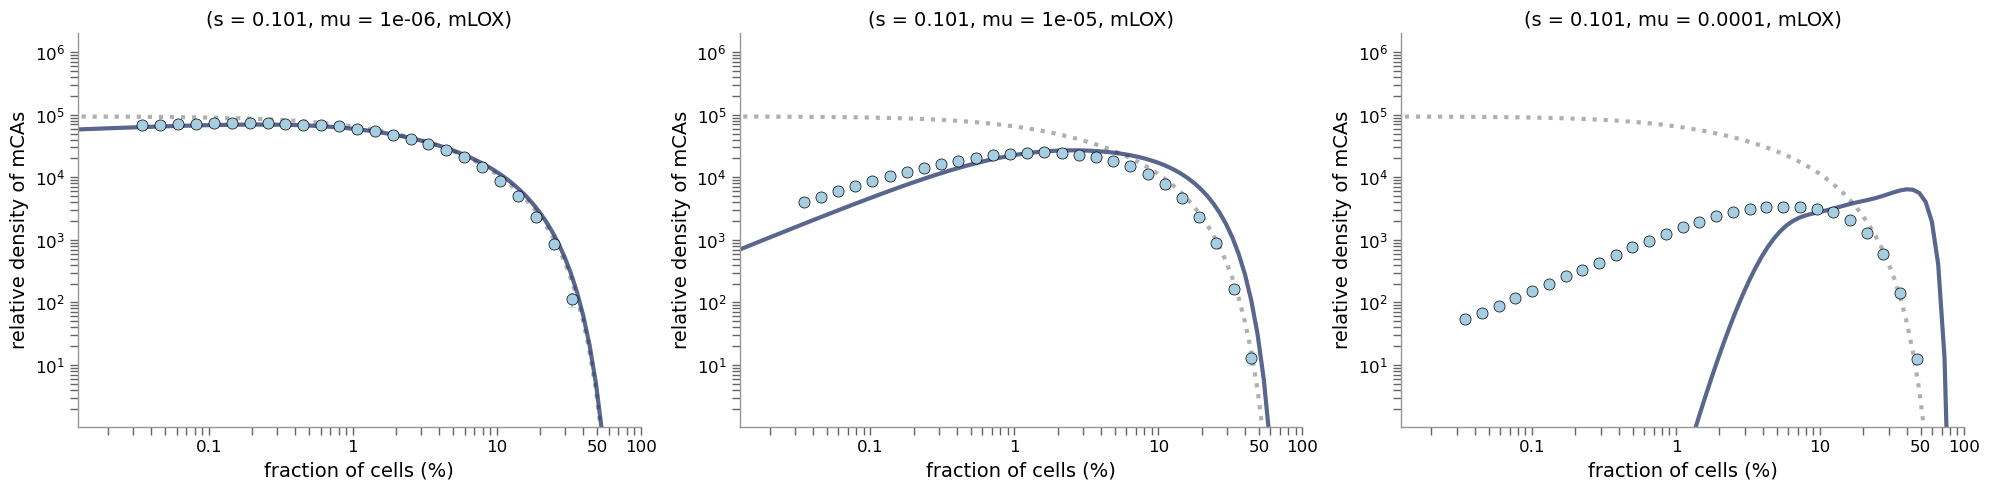

In [41]:
cell_fractions = [mLOX_cell_fractions_mu6, mLOX_cell_fractions_mu5, mLOX_cell_fractions_mu4]
mu_mCA = [1e-6, 1e-5, 1e-4]
s_mCA = 0.101

plot_3_cell_fractions(s_mCA, mu_mCA, cell_fractions, 'mLOX')